# Ecuaciones No Lineales

 


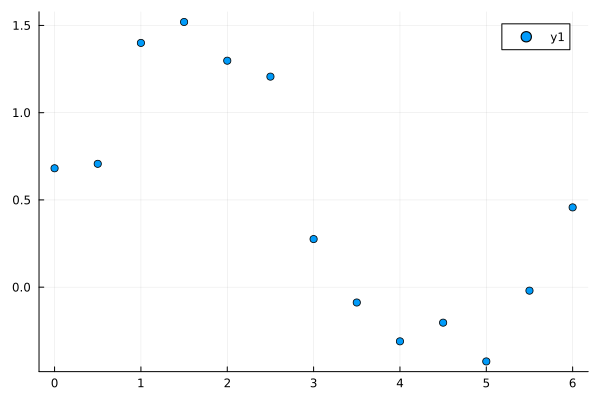

In [1]:
using LinearAlgebra,Plots;

x=0:.5:2*pi;
y=sin.(x)+rand(length(x));
n=length(x);
plot(x,y,seriestype = :scatter)

Ajustamos un polinomio de orden 1 y chequeamos el valor de la suma cuadratica de los residuos

$RSS= \sum_{i=1}^{n}\{y_i - f(\mathbf{x_i};\hat{\theta})\}^2$

In [3]:

X=hcat(ones(n),x);

print("El rango de la matriz X es : ",rank(X))

El rango de la matriz X es : 2

In [4]:
size(X)

(13, 2)

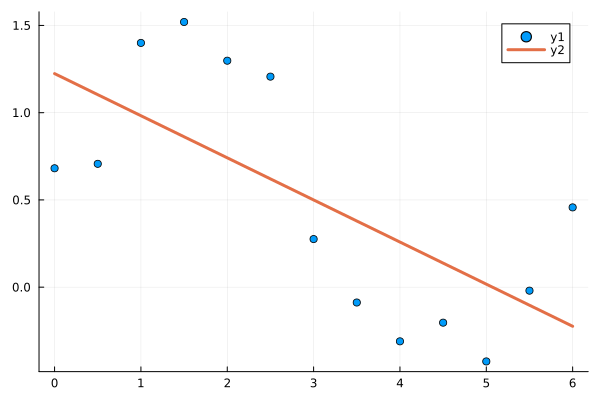

In [6]:
w=X\y
y_hat=X*w

plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)


In [7]:
w

2-element Vector{Float64}:
  1.223829375220647
 -0.2413336360155441

In [8]:
print("RSS : ",sum((y.-y_hat).^2))

RSS : 3.0873510178836336

Ajustamos un polinomio de orden 2

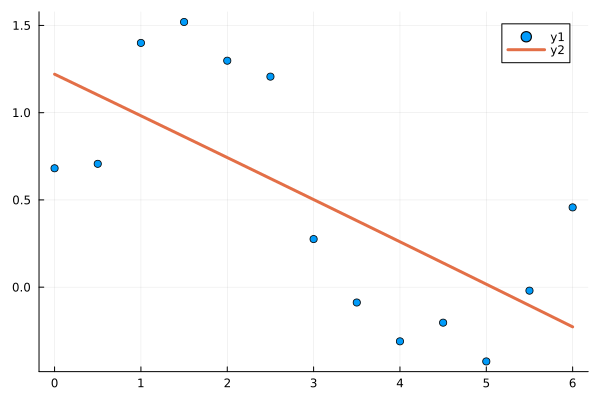

In [12]:
X=hcat(ones(n),x,x.^2);
w=X\y;
y_hat=X*w;
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [11]:
size(X)

(13, 3)

In [15]:
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 3, RSS : 3.087305106360648


Ajustamos un polinomio de orden 3

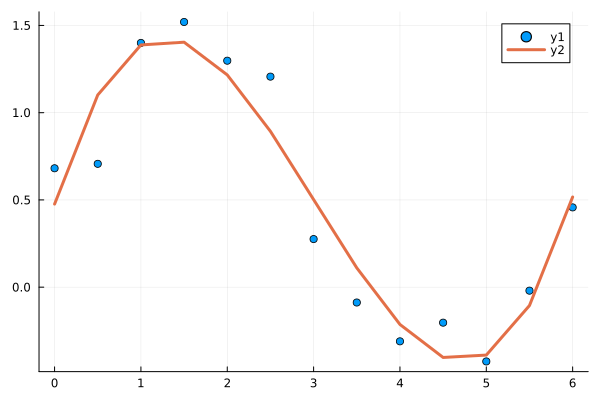

In [18]:
X=hcat(ones(n),x,x.^2,x.^3);
w=X\y
y_hat=X*w
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [19]:
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 4, RSS : 0.4680407841280724


In [21]:
x_new=minimum(x):0.1:maximum(x)
n_new=length(x_new)
X_new=hcat(ones(n_new),x_new,x_new.^2,x_new.^3);

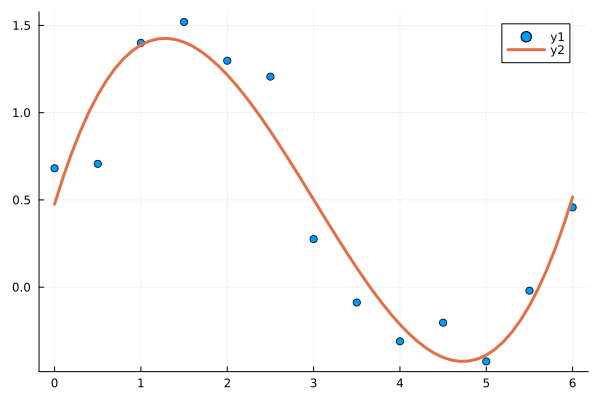

In [22]:
y_hat=X_new*w
plot(x,y,seriestype = :scatter)
plot!(x_new,y_hat,lw=3)

In [23]:
y_hat=X*w;
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 4, RSS : 0.4680407841280724


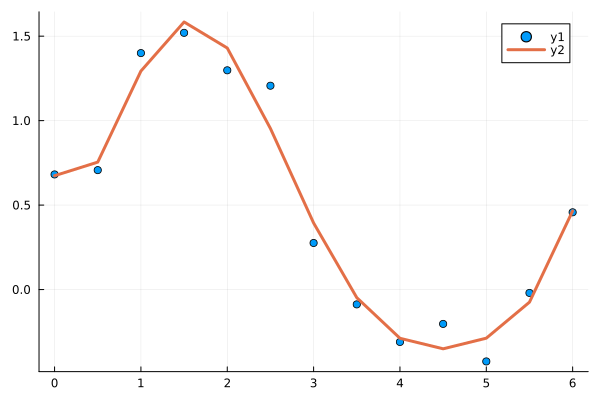

In [30]:
X=hcat(ones(n),x,x.^2,x.^3,x.^4,x.^5,x.^6,x.^7,x.^8);
w=X\y
y_hat=X*w
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [31]:
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 9, RSS : 0.15902609725159028


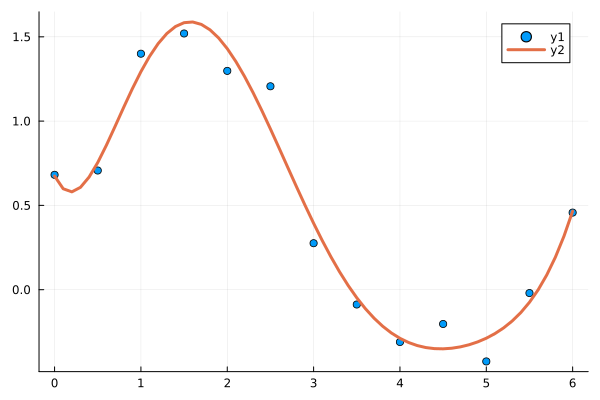

In [34]:
x_new=minimum(x):0.1:maximum(x)
n_new=length(x_new)
X_new=hcat(ones(n_new),x_new,x_new.^2,x_new.^3,x_new.^4,x_new.^5,x_new.^6,x_new.^7,x_new.^8);
y_hat=X_new*w
plot(x,y,seriestype = :scatter)
plot!(x_new,y_hat,lw=3)

In [33]:
w

9-element Vector{Float64}:
  0.6738339444283344
 -1.0762393261845251
  3.465280600990571
 -2.1843205637316276
  0.3852998648686615
  0.05403825123832006
 -0.027918876278327235
  0.0035426020748169974
 -0.0001520326773198441

In [35]:
import Pkg;

Pkg.add("CurveFit");

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [40]:
using CurveFit

fit = curve_fit(Polynomial, x, y, 8)


Polynomial(0.6738339444281625 - 1.0762393261476064*x + 3.465280600860943*x^2 - 2.1843205635646497*x^3 + 0.3852998647624749*x^4 + 0.05403825127528969*x^5 - 0.0279188762855049*x^6 + 0.003542602075546152*x^7 - 0.0001520326773500389*x^8)

In [37]:
w

9-element Vector{Float64}:
  0.6738339444283344
 -1.0762393261845251
  3.465280600990571
 -2.1843205637316276
  0.3852998648686615
  0.05403825123832006
 -0.027918876278327235
  0.0035426020748169974
 -0.0001520326773198441

# 2) Ejercicios 


2.1)Use un sistema de ecuaciones no lineales para predecir el consumo de gasolina de un vehiculo dependiendo del peso, desplazamiento, caballos de fuerza y aceleración de este. Descargue los datos desde :

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [41]:
using Downloads
using CSV
using CurveFit

In [42]:
file=Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

"/var/folders/wd/0sm_658d23ldnfyfjn6y4s6m0000gn/T/jl_M7CrQhM1Wh"

In [43]:
using DelimitedFiles

data=readdlm(file)

398×9 Matrix{Any}:
 18.0  8  307.0  130.0  3504.0  12.0  70  1  "chevrolet chevelle malibu"
 15.0  8  350.0  165.0  3693.0  11.5  70  1  "buick skylark 320"
 18.0  8  318.0  150.0  3436.0  11.0  70  1  "plymouth satellite"
 16.0  8  304.0  150.0  3433.0  12.0  70  1  "amc rebel sst"
 17.0  8  302.0  140.0  3449.0  10.5  70  1  "ford torino"
 15.0  8  429.0  198.0  4341.0  10.0  70  1  "ford galaxie 500"
 14.0  8  454.0  220.0  4354.0   9.0  70  1  "chevrolet impala"
 14.0  8  440.0  215.0  4312.0   8.5  70  1  "plymouth fury iii"
 14.0  8  455.0  225.0  4425.0  10.0  70  1  "pontiac catalina"
 15.0  8  390.0  190.0  3850.0   8.5  70  1  "amc ambassador dpl"
  ⋮                              ⋮           
 22.0  6  232.0  112.0  2835    14.7  82  1  "ford granada l"
 32.0  4  144.0   96.0  2665.0  13.9  82  3  "toyota celica gt"
 36.0  4  135.0   84.0  2370.0  13.0  82  1  "dodge charger 2.2"
 27.0  4  151.0   90.0  2950.0  17.3  82  1  "chevrolet camaro"
 27.0  4  140.0   86.0  2790.0  1

In [52]:
X=data[:,[1,3,4,5,6]];
X[X.=="?"].=0
X=Array{Float64}(X);
y=Array{Float64}(data[:,2]);

In [51]:
size(X),size(y)

((398, 5), (398,))

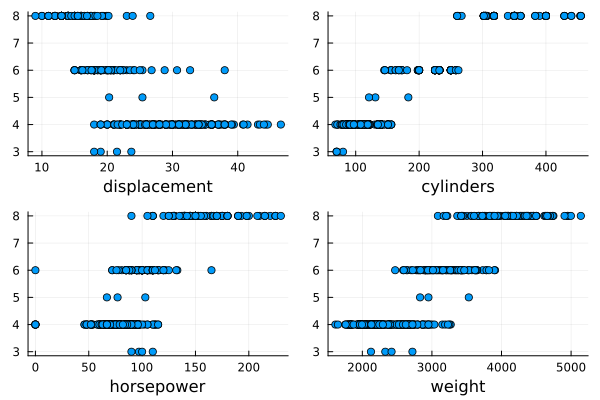

In [53]:
names=["displacement","cylinders","horsepower","weight","acceleration"]
p1=plot(X[:,1],y,seriestype = :scatter, xlabel = names[1])
p2=plot(X[:,2],y,seriestype = :scatter,xlabel = names[2])
p3=plot(X[:,3],y,seriestype = :scatter,xlabel = names[3])
p4=plot(X[:,4],y,seriestype = :scatter,xlabel = names[4])
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

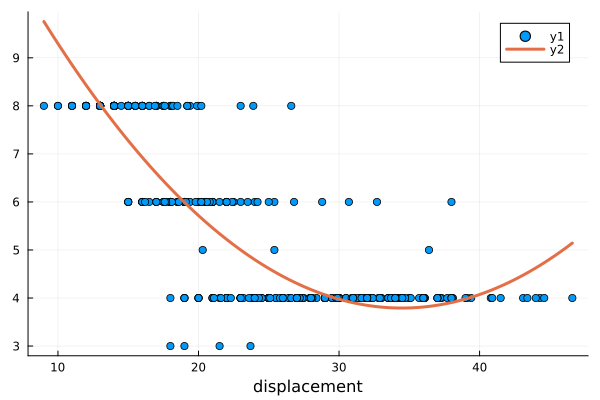

In [69]:
fit = curve_fit(Polynomial, X[:,1], y, 2);
X_new=range(minimum(X[:,1]),maximum(X[:,1]),length=100)
y_hat=fit.(X_new);
plot(X[:,1],y,seriestype = :scatter, xlabel = names[1])
plot!(X_new,y_hat,lw=3)

In [58]:
println("RSS : ",sum((y.-fit.(X[:,1])).^2));

RSS : 299.00828279629917


# Minimos Cuadrados Multivariable

In [60]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
x5=X[:,5];
X_poly=hcat(ones(n),x1,x2,x3,x4,x5,x1.^2,x2.^2,x3.^2,x4.^2,x5.^2);

In [61]:
print("El rango de la matriz X es : ",rank(X_poly));

El rango de la matriz X es : 11

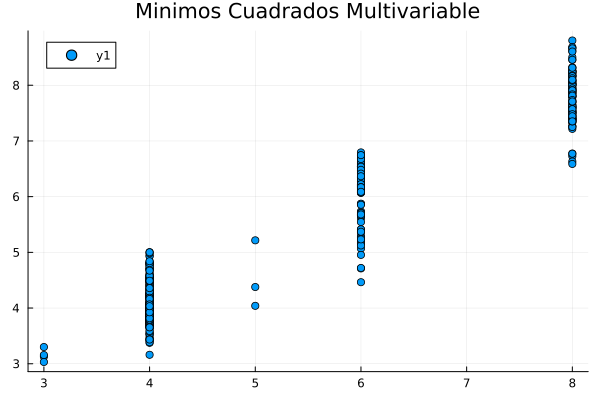

In [62]:
w=X_poly\y;
y_hat=X_poly*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Multivariable")


In [63]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 82.44796757766278


# Minimos Cuadrados Ordinarios

In [70]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
X_ord=hcat(ones(n),x1,x2,x3,x4);

In [71]:
print("El rango de la matriz X es : ",rank(X_ord));

El rango de la matriz X es : 5

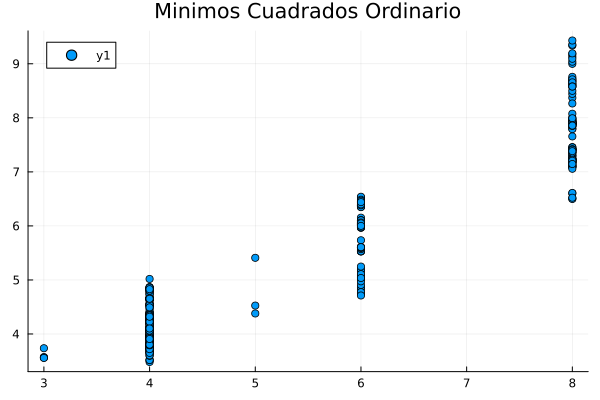

In [72]:
w=X_ord\y;
y_hat=X_ord*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Ordinario")

In [73]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 109.11521124063268


# Minimos Cuadrados con Interacciones

In [74]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
x5=X[:,5];
X_inter=hcat(ones(n),x1,x2,x3,x4,x5,x1.*x2,x1.*x3,x1.*x4,x1.*x5,x2.*x3,x2.*x4,x2.*x5,x3.*x4,x3.*x5,x4.*x5);

In [75]:
print("El rango de la matriz X es : ",rank(X_inter));

El rango de la matriz X es : 16

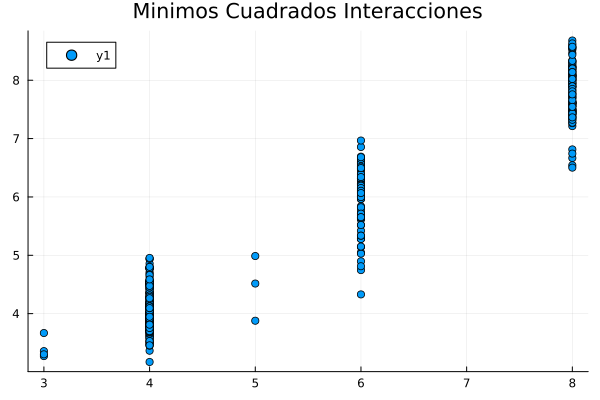

In [76]:
w=X_inter\y;
y_hat=X_inter*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Interacciones")

In [78]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 78.96701720882517


# Tarea 

Implemente un modelo predictivo para los precios de los cursos de Udemy, basado en el numero de suscriptores, reviews, cantidad de clases, nivel y duración de los contenidos.

Descargue los datos en:

https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal

In [80]:
using CSV,DataFrames

file="data/3.1-data-sheet-udemy-courses-web-development.csv"
data=CSV.read(file,DataFrame)

1205×12 DataFrame
  Row │ course_id  course_title                       url                      ⋯
      │ Int64?     String?                            String?                  ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     41295  Learn HTML5 Programming From Scr…  https://www.udemy.com/le ⋯
    2 │     59014  Coding for Entrepreneurs Basic     https://www.udemy.com/co
    3 │    625204  The Web Developer Bootcamp         https://www.udemy.com/th
    4 │    173548  Build Your First Website in 1 We…  https://www.udemy.com/bu
    5 │    764164  The Complete Web Developer Cours…  https://www.udemy.com/th ⋯
    6 │    473160  Web Design for Web Developers: B…  https://www.udemy.com/we
    7 │     94430  Learn Javascript & JQuery From S…  https://www.udemy.com/le
    8 │    130064  Practical PHP: Master the Basics…  https://www.udemy.com/co
  ⋮   │     ⋮                      ⋮                                  ⋮        ⋱
 1199 │   1170920  Node:js : Building Rest Apis wit…  https://www.udemy.com/bu ⋯
 1200 │   1131732  Set up a localhost Web Server fo…  https://www.udemy.com/lo
 1201 │   1227578  Learning Path: The Road to Elast…  https://www.udemy.com/le
 1202 │   1277924  Angular 4 Front To Back            https://www.udemy.com/an
 1203 │   1248172  Essentials of Spring 5.0 for Dev…  https://www.udemy.com/es ⋯
 1204 │   1250934  Display and analyze GIS data on …  https://www.udemy.com/di
 1205 │   1270222  Learning Path: Web Applications …  https://www.udemy.com/le
                                                10 columns and 1190 rows omitted

In [81]:
data=dropmissing(data)

1203×12 DataFrame
  Row │ course_id  course_title                       url                      ⋯
      │ Int64      String                             String                   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     41295  Learn HTML5 Programming From Scr…  https://www.udemy.com/le ⋯
    2 │     59014  Coding for Entrepreneurs Basic     https://www.udemy.com/co
    3 │    625204  The Web Developer Bootcamp         https://www.udemy.com/th
    4 │    173548  Build Your First Website in 1 We…  https://www.udemy.com/bu
    5 │    764164  The Complete Web Developer Cours…  https://www.udemy.com/th ⋯
    6 │    473160  Web Design for Web Developers: B…  https://www.udemy.com/we
    7 │     94430  Learn Javascript & JQuery From S…  https://www.udemy.com/le
    8 │    130064  Practical PHP: Master the Basics…  https://www.udemy.com/co
  ⋮   │     ⋮                      ⋮                                  ⋮        ⋱
 1197 │   1170920  Node:js : Building Rest Apis wit…  https://www.udemy.com/bu ⋯
 1198 │   1131732  Set up a localhost Web Server fo…  https://www.udemy.com/lo
 1199 │   1227578  Learning Path: The Road to Elast…  https://www.udemy.com/le
 1200 │   1277924  Angular 4 Front To Back            https://www.udemy.com/an
 1201 │   1248172  Essentials of Spring 5.0 for Dev…  https://www.udemy.com/es ⋯
 1202 │   1250934  Display and analyze GIS data on …  https://www.udemy.com/di
 1203 │   1270222  Learning Path: Web Applications …  https://www.udemy.com/le
                                                10 columns and 1188 rows omitted

In [82]:
describe(data)

12×7 DataFrame
 Row │ variable             mean       min                                medi ⋯
     │ Symbol               Union…     Any                                Unio ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ course_id            7.06875e5  8324                               7383 ⋯
   2 │ course_title                    1 Hour CSS                             
   3 │ url                             https://www.udemy.com/1-hour-css/      
   4 │ price                77.0366    0                                  50.0
   5 │ num_subscribers      6635.02    19                                 2430 ⋯
   6 │ num_reviews          357.356    0                                  65.0
   7 │ num_lectures         52.7672    5                                  32.0
   8 │ level                           All Levels                             
   9 │ Rating               0.643051   0.0                                0.76 ⋯
  10 │ content_duration     5.58666    0.5                                3.0
  11 │ published_timestamp             2011-07-09T05:43:31Z                   
  12 │ subject                         Subject: Web Development               
                                                               4 columns omitted

In [123]:
y=data[!,4]
X=data[!,[5,6,7,9,10]]

1203×5 DataFrame
  Row │ num_subscribers  num_reviews  num_lectures  Rating   content_duration 
      │ Int64            Int64        Int64         Float64  Float64          
──────┼───────────────────────────────────────────────────────────────────────
    1 │          268923         8629            45     0.82              10.5
    2 │          161029          279            27     0.69               3.5
    3 │          121584        27445           342     0.89              43.0
    4 │          120291         5924            30     0.78               3.0
    5 │          114512        22412           304     0.55              30.5
    6 │           98867         6512            20     0.82               3.0
    7 │           84897         2685            10     0.79               2.0
    8 │           83737         4598            45     0.85               6.5
  ⋮   │        ⋮              ⋮            ⋮           ⋮            ⋮
 1197 │              61            9            44     0.11               2.0
 1198 │              55           13            31     0.88               1.5
 1199 │              50            5            60     0.96               5.0
 1200 │              44            0            68     0.15               8.5
 1201 │              34            2            21     0.46               1.5
 1202 │              25            4            66     0.67              12.5
 1203 │              19            2            33     0.12               4.0
                                                             1188 rows omitted

In [157]:
X=Float64.(X)

1203×5 DataFrame
  Row │ num_subscribers  num_reviews  num_lectures  Rating   content_duration 
      │ Float64          Float64      Float64       Float64  Float64          
──────┼───────────────────────────────────────────────────────────────────────
    1 │        268923.0       8629.0          45.0     0.82              10.5
    2 │        161029.0        279.0          27.0     0.69               3.5
    3 │        121584.0      27445.0         342.0     0.89              43.0
    4 │        120291.0       5924.0          30.0     0.78               3.0
    5 │        114512.0      22412.0         304.0     0.55              30.5
    6 │         98867.0       6512.0          20.0     0.82               3.0
    7 │         84897.0       2685.0          10.0     0.79               2.0
    8 │         83737.0       4598.0          45.0     0.85               6.5
  ⋮   │        ⋮              ⋮            ⋮           ⋮            ⋮
 1197 │            61.0          9.0          44.0     0.11               2.0
 1198 │            55.0         13.0          31.0     0.88               1.5
 1199 │            50.0          5.0          60.0     0.96               5.0
 1200 │            44.0          0.0          68.0     0.15               8.5
 1201 │            34.0          2.0          21.0     0.46               1.5
 1202 │            25.0          4.0          66.0     0.67              12.5
 1203 │            19.0          2.0          33.0     0.12               4.0
                                                             1188 rows omitted

In [158]:
mat=[ (X[:,i].-mean(X[:,i]))/std(X[:,i]) for i in range(1,5)]
X_m=reduce(hcat,mat)

1203×5 Matrix{Float64}:
 18.015      5.25879    -0.123757    0.578259    0.678371
 10.6044    -0.0498156  -0.410553    0.153427   -0.288099
  7.89516   17.2213      4.60839     0.807014    5.16555
  7.80635    3.53906    -0.362754    0.447541   -0.357132
  7.40943   14.0215      4.00293    -0.304084    3.43971
  6.33487    3.91288    -0.522085    0.578259   -0.357132
  5.37535    1.47983    -0.681417    0.480221   -0.4952
  5.29568    2.69604    -0.123757    0.676297    0.126102
  5.01235   10.5655      0.513569    0.153427    0.816438
  4.612     12.2649      4.40126     0.839694    2.26614
  ⋮                                             
 -0.449676  -0.222107    0.0355747  -1.48054    -0.150032
 -0.450157  -0.218292   -0.314954   -0.598198   -0.633267
 -0.451531  -0.221471   -0.13969    -1.74198    -0.4952
 -0.451943  -0.218928   -0.346821    0.774335   -0.564233
 -0.452286  -0.224014    0.11524     1.03577    -0.0809982
 -0.452698  -0.227193    0.242706   -1.61126     0.402237
 -0.4

In [204]:
X_mat=Matrix(X);
w=X_mat\log1p.(y);
y_hat=X_mat*w;
println(" RSS : ",sum((log1p.(y)-y_hat).^2))

 RSS : 4456.489301489342


In [201]:
w

5-element Vector{Float64}:
 -2.1932070473581872e-6
 -6.3126028607322e-5
  0.011485832386038538
  3.7359566633131305
  0.041655692142089605

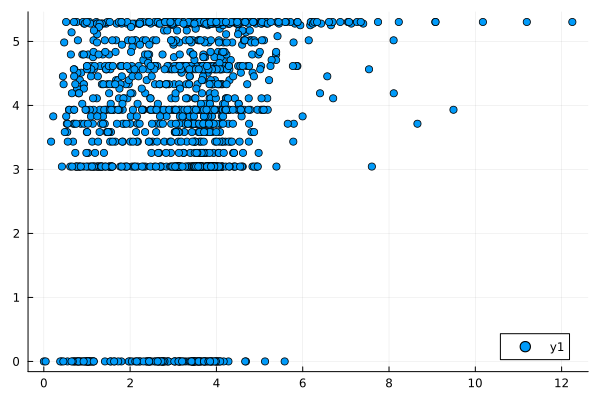

In [202]:
scatter(y_hat,log1p.(y))

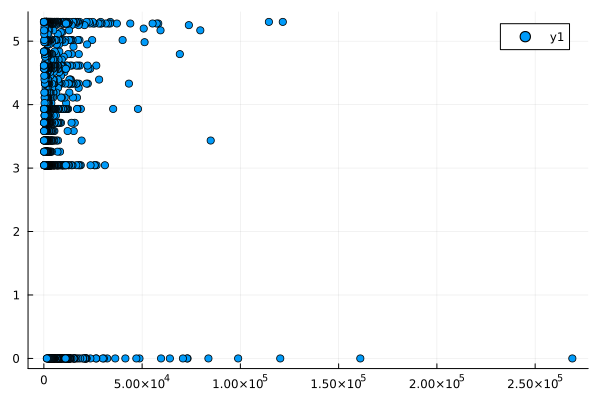

In [206]:
scatter(X[:,1],log1p.(y))

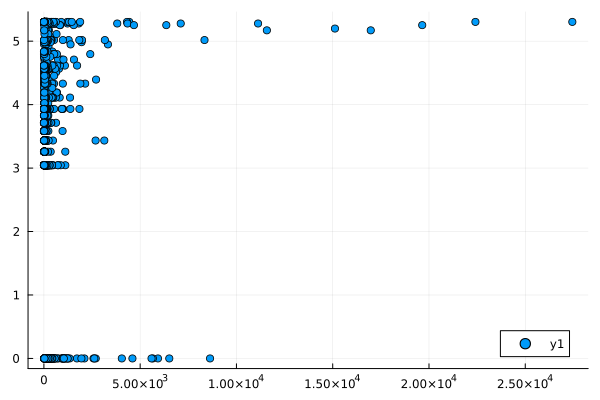

In [209]:
scatter(X[:,2],log1p.(y))

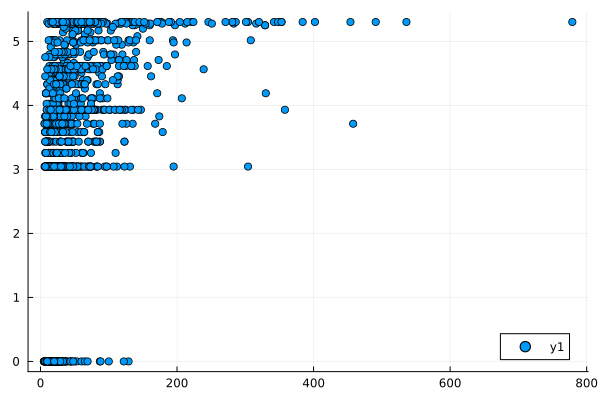

In [210]:
scatter(X[:,3],log1p.(y))

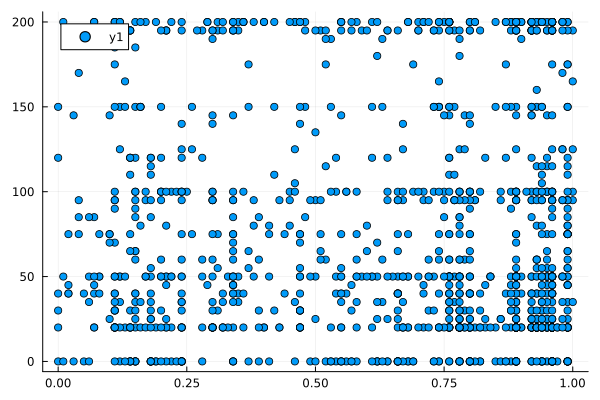

In [180]:
scatter(X[:,4],y)